In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [2]:
classificador = Sequential()
classificador.add(Conv2D(64, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(128, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

#classificador Conv2D 3

classificador.add(Conv2D(128, (3,3), activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 512, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [3]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7, # Grau a rotar a imagem
                                         horizontal_flip = True, # Giros horizontais nas imagens
                                         shear_range = 0.2, # Mudança dos pixels para outra direção
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [4]:
batch = 4
base_treinamento = gerador_treinamento.flow_from_directory('dataset_personagens/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = batch,
                                                           class_mode = 'binary')
base_teste = gerador_teste.flow_from_directory('dataset_personagens/test_set',
                                               target_size = (64, 64),
                                               batch_size = batch,
                                               class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [5]:
len(base_treinamento)

49

In [8]:
classificador.fit_generator(base_treinamento, steps_per_epoch = 196/batch, # (numero de fotos/ batch_size)
                            epochs = 100, validation_data = base_teste,
                            validation_steps = 74/batch)

Epoch 1/100
49/49 [==============================] - 4s 88ms/step - loss: 0.2512 - accuracy: 0.9184 - val_loss: 2.0434 - val_accuracy: 0.6351
Epoch 2/100
49/49 [==============================] - 4s 89ms/step - loss: 0.2173 - accuracy: 0.9337 - val_loss: 2.5528 - val_accuracy: 0.7297
Epoch 3/100
49/49 [==============================] - 4s 88ms/step - loss: 0.1634 - accuracy: 0.9184 - val_loss: 2.1618 - val_accuracy: 0.6486
Epoch 4/100
49/49 [==============================] - 4s 88ms/step - loss: 0.1990 - accuracy: 0.9439 - val_loss: 0.5569 - val_accuracy: 0.8514
Epoch 5/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0809 - accuracy: 0.9643 - val_loss: 0.8123 - val_accuracy: 0.8514
Epoch 6/100
49/49 [==============================] - 4s 86ms/step - loss: 0.1578 - accuracy: 0.9541 - val_loss: 0.2744 - val_accuracy: 0.9054
Epoch 7/100
49/49 [==============================] - 4s 87ms/step - loss: 0.1093 - accuracy: 0.9541 - val_loss: 0.7083 - val_accuracy: 0.8378
Epoch 

In [9]:
base_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [10]:
imagem_teste = image.load_img('dataset_personagens/test_set/homer/homer30.bmp',
                              target_size = (64,64))

Text(0.5, 1.0, 'Classe Cachorro')

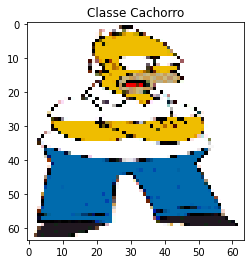

In [11]:
import matplotlib.pyplot as plt
plt.imshow(imagem_teste)
plt.title('Classe Cachorro' )

In [12]:
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [13]:
previsao = classificador.predict(imagem_teste)
previsao

array([[1.]], dtype=float32)

In [14]:
previsao = (previsao > 0.5)
previsao

array([[ True]])

Text(0.5, 1.0, 'Classe Gato')

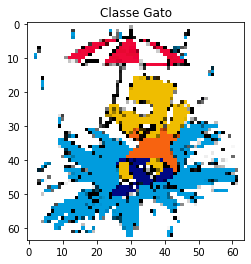

In [15]:
imagem_teste2 = image.load_img('dataset_personagens/test_set/bart/bart25.bmp',
                              target_size = (64,64))
import matplotlib.pyplot as plt
plt.imshow(imagem_teste2)
plt.title('Classe Gato' )

In [16]:
imagem_teste2 = image.img_to_array(imagem_teste2)
imagem_teste2 /= 255

# Expandir as dimensões from (64, 64, 3) to (1, 64, 64, 3)
# Um tensor, com um batch size
imagem_teste2 = np.expand_dims(imagem_teste2, axis = 0)

In [17]:
previsao = classificador.predict(imagem_teste2)
print(previsao)
previsao = (previsao > 0.5)
print(previsao)

[[7.533551e-09]]
[[False]]
